# [CM7] Interpretability

## The implementation is done for the best hyper-parameters of naive bayes and decision trees using the original features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.naive_bayes import GaussianNB


In [2]:
covid_dataset = pd.read_csv("cleaned_normalized_coviddata.csv")
x,x_test,y,y_test = train_test_split(covid_dataset.iloc[:,2:-3],covid_dataset.iloc[:,-3:].astype(int),test_size=0.2,random_state=98)


### Naive Bayes Implementation

In [3]:
#Label: Recovered
classifier_gaussian_recovered = GaussianNB(var_smoothing = 1e-1)
classifier_gaussian_recovered.fit(x,y.loc[:,'Recovered'])
scores_nb_recovered = classifier_gaussian_recovered.score(x_test,y_test.loc[:,'Recovered'])
#LAbel: Deaths
classifier_gaussian_deaths = GaussianNB(var_smoothing = 0.75)
classifier_gaussian_deaths.fit(x,y.loc[:,'Deaths'])
scores_nb_deaths = classifier_gaussian_deaths.score(x_test,y_test.loc[:,'Deaths'])
#Label : Confirmed
classifier_gaussian_confirmed = GaussianNB(var_smoothing = 1)
classifier_gaussian_confirmed.fit(x,y.loc[:,'Confirmed'])
scores_nb_confirmed = classifier_gaussian_confirmed.score(x_test,y_test.loc[:,'Confirmed'])



In [4]:
print(scores_nb_recovered.mean())
print(scores_nb_deaths.mean())
print(scores_nb_confirmed.mean())

0.7210144927536232
0.894927536231884
0.9456521739130435


### Decision Tree Implementation

In [5]:
#Label : Recovered
classifier_DecisionTree_recovered = DecisionTreeClassifier(max_depth = 3)
classifier_DecisionTree_recovered.fit(x,y.loc[:,'Recovered'])
scores_d_recovered = classifier_DecisionTree_recovered.score(x_test,y_test.loc[:,'Recovered'])
# Label : Deaths
classifier_DecisionTree_deaths= DecisionTreeClassifier(max_depth = 3)
classifier_DecisionTree_deaths.fit(x,y.loc[:,'Deaths'])
scores_d_deaths = classifier_DecisionTree_deaths.score(x_test,y_test.loc[:,'Deaths'])
#Label : Confirmed
classifier_DecisionTree_confirmed = DecisionTreeClassifier(max_depth = 3)
classifier_DecisionTree_confirmed.fit(x,y.loc[:,'Confirmed'])
scores_d_confirmed = classifier_DecisionTree_confirmed.score(x_test,y_test.loc[:,'Confirmed'])


In [6]:
print(scores_d_recovered.mean())
print(scores_d_deaths.mean())
print(scores_d_confirmed.mean())

0.7862318840579711
0.9057971014492754
0.9565217391304348


### From the above accuracy values, it can be inferred that decision tree performs almost similar to gaussian naive bayes

## Learning Parameters of NB for data Interpretation and comparision

In [7]:
var = pd.DataFrame()
var[0]=(list(list(classifier_gaussian_recovered.sigma_)[0]))
var[1]=(list(list(classifier_gaussian_recovered.sigma_)[1]))
var.columns = ['True','False']
var.index = list(x.columns)
var.T

,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
True,2.102807,1.903569,2.025485,0.807028,1.571866,1.141637,1.445363,1.801357,0.354314,1.047409,1.550491
False,0.526993,0.603241,0.315986,1.233058,0.625900,1.064626,0.914632,0.496507,1.680216,1.092018,0.881031


### These represent the variance between two classes of Label recovered

In [8]:
mean = pd.DataFrame()
mean[0]=(list(list(classifier_gaussian_recovered.theta_)[0]))
mean[1]=(list(list(classifier_gaussian_recovered.theta_)[1]))
mean.columns = ['True','False']
mean.index = list(x.columns)
mean.T

,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
True,-0.222705,-0.274367,0.277679,-0.182613,0.192396,0.079321,0.113771,0.233726,-0.080190,-0.237497,-0.119118
False,0.156457,0.143668,-0.210219,0.134183,-0.146766,-0.074567,-0.033171,-0.173113,0.065903,0.149274,0.107242


### These represent the mean of the two classes of label : recovered

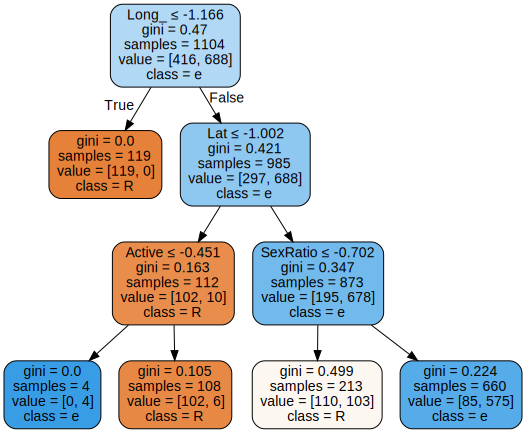

In [9]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier_DecisionTree_recovered,out_file = None,
                               feature_names = x.columns,
                               class_names = 'Recovered',
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph

## Inferences from learned parameters

### The Long_ feature of 'False' class has very high variance and low mean. This plays a very crutial role in decision making to classify 'False' from the other parameters. Similarly from the above graph of decision trees, the Long_ becomes the head node and child nodes are created for the 'False' category. Thus from the above parameters it can be inferred that the decision making process of naive bayes and decision trees are similar though the parameters and calculations are different 